In [1]:
import tensorflow as tf

# Load images from the directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'DL Dataset/train',  # e.g., 'dataset/train'
    image_size=(180, 180),         # Resize images to 180x180
    batch_size=32,                 # Number of images to run in each batch
    label_mode='int'               # Return labels as integers
)

# Displaying a batch of images and labels
for images, labels in train_ds.take(1):
    print(images.shape)  # (32, 180, 180, 3) for a batch of 32 images
    print(labels.numpy())  # Array of labels

Found 3705 files belonging to 25 classes.
(32, 180, 180, 3)
[20  1 19 18 14 18 21 16 23  8 15  7 24  7  9 23  9  1  1 20 11  5 21  6
 11  9  0 11 12 14  2  4]


Found 3705 files belonging to 25 classes.


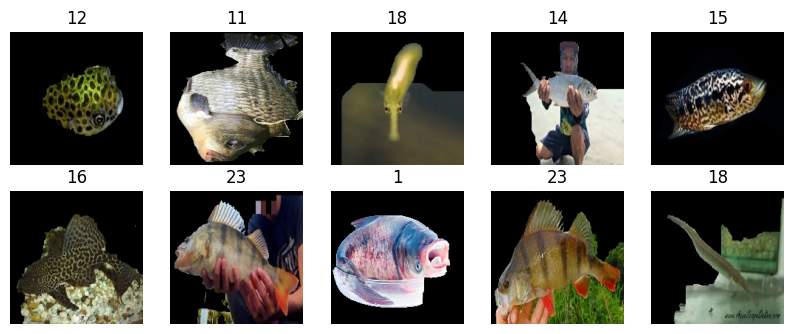

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'DL Dataset/train',        # Replace with your dataset path
    image_size=(180, 180),         # Resize images to 180x180
    batch_size=32,                 # Number of images to return in each batch
    label_mode='int'               # Return labels as integers
)

# Display 10 images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset folders
train_folder = 'DL Dataset/train'
valid_folder = 'DL Dataset/val'

# Image dimensions
img_width, img_height = 150, 150  # Adjust size as needed

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    valid_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 3705 images belonging to 25 classes.
Found 2229 images belonging to 25 classes.


In [4]:
# Hyperparameters
input_shape = (227, 227, 3) # AlexNet's input size 
num_classes = 25 # Assuming binary classification (2 classes) 
batch_size = 32
epochs = 100

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your training data directory
train_data_dir = 'DL Dataset/train'  # Replace with the actual path to your training data

# Define batch size
batch_size = 32  # Adjust based on your system's memory and requirements

# Data Augmentation for training images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

# Load images from the directory
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(227, 227),  # Image size (227x227 as per AlexNet)
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # Use 'categorical' for multi-class


Found 3705 images belonging to 25 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def alexnet_model(input_shape, num_classes):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd, 4th, 5th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    model.add(BatchNormalization())

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    
    # Adding regularization to prevent overfitting
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Reduced size and added L2 regularization
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Reduced size and added L2 regularization
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [13]:
# Define input shape and number of classes
input_shape = (227, 227, 3)
num_classes = 25

In [14]:
# Create the AlexNet model
model = alexnet_model(input_shape, num_classes)

In [15]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [16]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
# Reduce image size and batch size to reduce memory usage
input_shape = (150, 150, 3)  # Resize images to 150x150 to reduce memory

# Create the model again with the new input shape
model = alexnet_model(input_shape, num_classes)

# Reduce batch size
batch_size = 16  # Smaller batch size to reduce memory usage

# Use ImageDataGenerator with flow_from_directory for efficient memory use
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation images

# Load data in batches from the directory to avoid memory issues
train_generator = train_datagen.flow_from_directory(
    'DL Dataset/train',
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    'DL Dataset/val',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Compile the model with the new input shape and optimizations
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Show the model summary
model.summary()

Found 3705 images belonging to 25 classes.
Found 2229 images belonging to 25 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 35, 35, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 17, 17, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 17, 17, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 17, 17, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,411,929 (16.83 MB)

 Trainable params: 4,410,713 (16.83 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=100,  # Any high number for epochs, early stopping will take care of when to stop
    validation_data=valid_generator,
    callbacks=[early_stopping]
)

Epoch 1/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.0463 - loss: 9.5983 - val_accuracy: 0.0727 - val_loss: 5.7212
Epoch 2/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.0574 - loss: 5.1761 - val_accuracy: 0.0938 - val_loss: 3.8612
Epoch 3/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.0884 - loss: 3.7794 - val_accuracy: 0.1086 - val_loss: 3.4730
Epoch 4/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.0894 - loss: 3.3689 - val_accuracy: 0.0691 - val_loss: 3.4166
Epoch 5/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 121ms/step - accuracy: 0.1098 - loss: 3.2479 - val_accuracy: 0.0897 - val_loss: 3.2386
Epoch 6/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 122ms/step - accuracy: 0.1240 - loss: 3.1514 - val_accuracy: 0.1009 - val_loss: 3.2389
Epoch 7/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - accuracy: 0.1215 - loss: 3.1481 - val_accuracy: 0.1009 - val_loss: 3.3973
Epoch 8/100
232/232 ━━━━━━━━━━━━━━━━━━━━ 29s 123ms/step - accuracy: 0.1317 -

In [8]:
# Evaluate the model
# You can add a validation or test dataset for better evaluation 
train_generator.reset() # Reset the generator for evaluation

In [9]:
eval_metrics = model.evaluate(train_generator) 
print(f"Accuracy: {eval_metrics[1]:.4f}") 
print(f"Precision: {eval_metrics[2]:.4f}") 
print(f"Recall: {eval_metrics[3]:.4f}")

116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 229ms/step - accuracy: 0.7735 - loss: 0.7451 - precision: 0.9067 - recall: 0.6351
Accuracy: 0.7765
Precision: 0.9081
Recall: 0.6402


In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions
y_pred = model.predict(train_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = train_generator.classes

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys()))


116/116 ━━━━━━━━━━━━━━━━━━━━ 28s 237ms/step
Classification Report:

                       precision    recall  f1-score   support

               Bangus       0.04      0.06      0.05       150
        Big Head Carp       0.02      0.01      0.02       150
   Black Spotted Barb       0.01      0.01      0.01       150
              Catfish       0.04      0.05      0.04       150
       Climbing Perch       0.02      0.02      0.02       150
 Fourfinger Threadfin       0.01      0.01      0.01       150
       Freshwater Eel       0.00      0.00      0.00       149
       Glass Perchlet       0.06      0.05      0.05       148
                 Goby       0.04      0.03      0.04       150
            Gold Fish       0.05      0.05      0.05       150
              Gourami       0.06      0.06      0.06       150
           Grass Carp       0.05      0.07      0.06       150
 Green Spotted Puffer       0.04      0.03      0.03       110
          Indian Carp       0.04      0.05      0

In [14]:
#GRAPH PLOTTING FOR ACCURACY AND VALIDATION

Epoch 1/10


c:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.8768 - loss: 0.4438 - val_accuracy: 0.9581 - val_loss: 0.1377
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9670 - loss: 0.1113 - val_accuracy: 0.9712 - val_loss: 0.0990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9769 - loss: 0.0757 - val_accuracy: 0.9759 - val_loss: 0.0770
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9835 - loss: 0.0535 - val_accuracy: 0.9768 - val_loss: 0.0733
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.9882 - loss: 0.0408 - val_accuracy: 0.9775 - val_loss: 0.0743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9905 - loss: 0.0333 - val_accuracy: 0.9794 - val_loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9929 - loss: 0.0243 - val_accuracy: 0.9780 - val_loss: 0.0694
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.9952 - loss: 0.01

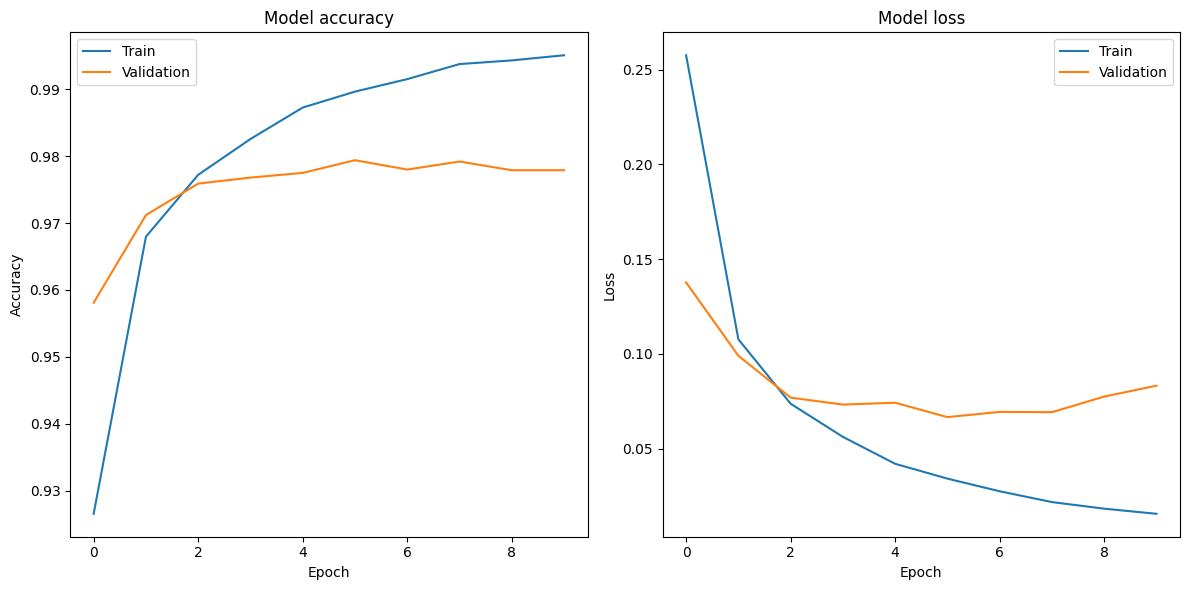

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset (example using MNIST dataset)
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: normalize and reshape
X_train = X_train / 255.0
X_val = X_val / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

# Create a simple model (for example purposes)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('fish_classifier_model.h5')

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Function to predict the category of an image
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[class_idx]

# Example usage
img_path = 'DL Dataset/train/Bangus/Bangus 101.jpg'  # Replace with the path to the image
predicted_class = predict_image(img_path)
print(f'The image is predicted to be in the category: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The image is predicted to be in the category: Indian Carp


Press 'q' to quit the camera window.


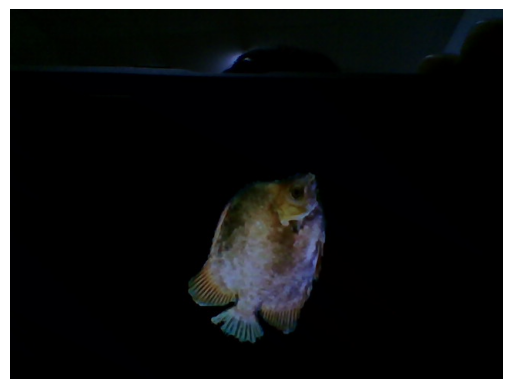

Press 's' to save, 'q' to quit:  s


Captured image saved as captured_image.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The captured image is predicted to be in the category: Long-Snouted Pipefish


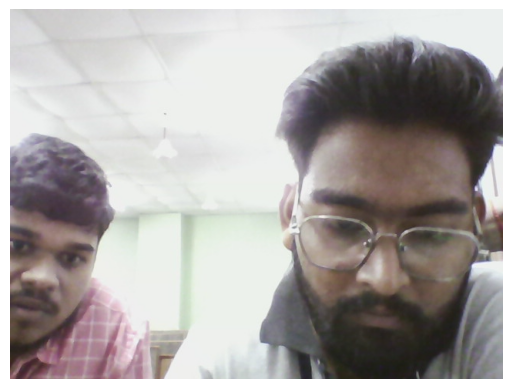

Press 's' to save, 'q' to quit:  q


In [28]:
import cv2
import matplotlib.pyplot as plt

def capture_and_predict():
    # Open a connection to the camera
    cap = cv2.VideoCapture(0)
    
    # Check if the camera opened successfully
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return
    
    print("Press 'q' to quit the camera window.")
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Could not read frame.")
            break
        
        # Display the resulting frame using matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        # Press 's' to save the frame and make a prediction
        key = input("Press 's' to save, 'q' to quit: ")
        if key == 's':
            img_path = 'captured_image.jpg'
            cv2.imwrite(img_path, frame)
            print(f"Captured image saved as {img_path}.")
            predicted_class = predict_image(img_path)
            print(f'The captured image is predicted to be in the category: {predicted_class}')
        
        # Press 'q' to quit
        if key == 'q':
            break
    
    # Release the capture and close windows
    cap.release()

# Example usage
capture_and_predict()

In [20]:
#VIDEO PROCESSING

In [21]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

In [22]:
def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while True:
        # Read the next frame
        ret, frame = cap.read()

        if not ret:
            break  # Exit loop if video ends

        # Resize the frame to match the input size of your model (e.g., 180x180)
        img = cv2.resize(frame, (180, 180))

        # Preprocess the frame for your model
        img_array = keras_image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class of the current frame
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Get the class label (assuming you have a list of class names)
        label = class_labels[predicted_class]

        # Draw the bounding box and label (this can be adjusted if you have detection)
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.rectangle(frame, (50, 50), (300, 300), (255, 0, 0), 2)  # Placeholder for bounding box

        # Display the frame with the predicted label
        cv2.imshow('Video', frame)

        # Press 'q' to exit the video early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close windows
    cap.release()
    cv2.destroyAllWindows()

In [23]:
print(model.input_shape)


(None, 150, 150, 3)


In [24]:
import cv2
import numpy as np

# Define the list of class labels corresponding to your model's output classes
class_labels = [
    'Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 
    'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 
    'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 
    'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 
    'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 
    'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia'
]

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Resize frame to the input size expected by the model (150x150)
        frame_resized = cv2.resize(frame, (150, 150))
        
        # Preprocess the frame for model input
        img_array = np.array(frame_resized)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
        # Predict the class of the current frame
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        
        # Get the class label
        class_label = class_labels[predicted_class]
        
        # Draw the class label on the original frame (before resizing for display)
        cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        # Display the resulting frame
        cv2.imshow('Fish Classification', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function with the video path
process_video(r"C:\Users\PRIYANSHU\Desktop\ML DOMAIN PROJECTS\Image analytics\WhatsApp Video 2024-09-15 at 01.27.21_e6242311.mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

KeyboardInterrupt: 

In [25]:
#2nd TRY with encircling

In [26]:
import cv2
import numpy as np

# Define the list of class labels corresponding to your model's output classes
class_labels = [
    'Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 
    'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 
    'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 
    'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 
    'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 
    'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia'
]

def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Process the frame in sliding windows to "detect" multiple fishes
        h, w, _ = frame.shape
        step_size = 100  # Size of the sliding window
        for y in range(0, h - 150, step_size):
            for x in range(0, w - 150, step_size):
                # Extract the region of interest (ROI) from the frame
                roi = frame[y:y + 150, x:x + 150]

                # Preprocess the ROI for model input
                img_array = np.array(roi)
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                # Predict the class of the ROI
                predictions = model.predict(img_array)
                predicted_class = np.argmax(predictions, axis=1)[0]
                class_label = class_labels[predicted_class]

                # If the predicted class is confident enough, draw a circle and hover the class label
                confidence = np.max(predictions)
                if confidence > 0.7:  # Confidence threshold for drawing
                    # Draw a circle around the detected fish
                    center = (x + 75, y + 75)  # Center of the ROI
                    radius = 75  # Radius of the circle
                    cv2.circle(frame, center, radius, (0, 255, 0), 2)  # Draw green circle
                    cv2.putText(frame, class_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
        
        # Display the resulting frame
        cv2.imshow('Fish Classification', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function with the video path
process_video(r"C:\Users\PRIYANSHU\Desktop\ML DOMAIN PROJECTS\Image analytics\WhatsApp Video 2024-09-15 at 01.27.21_e6242311.mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 